Python 3.9.23環境

MOVは扱いにくいのでMP4形式の動画に変換したほうがよい（ffmpegなどが便利）-kohta -maeda -from Maeda0918

In [ ]:
pip install ultralytics #localで編集したよ

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pillow-11.3.0-cp39-cp39-win_amd64.whl.metadata (9.2 kB)
  Using cached PyYAML-6.0.2-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.8.0-cp39-cp39-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp39-cp39-win_amd64.whl.metadata (6.1 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp39-cp39-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB

In [5]:
pip install pandas

  Using cached pandas-2.3.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.2-cp39-cp39-win_amd64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]


In [5]:
import cv2
from ultralytics import solutions
import os

# 1. MP4動画ファイルのパスを指定
input_mp4_path = "正面入口.mp4"

# 2. 動画ファイルの読み込み
cap = cv2.VideoCapture(input_mp4_path)
if not cap.isOpened():
    print("動画ファイルを読み込めませんでした。パスを確認してください。")
    exit()

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# 3. 処理済み動画の出力設定
filename_without_ext = os.path.splitext(input_mp4_path)[0]
output_mp4_path = f"{filename_without_ext}_processed.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_mp4_path, fourcc, fps, (w, h))

# 4. カウント領域の定義（Line）
region_points = [(600, 460), (300, 1670)]#[(始点のX座標600, 始点のY座標460), (終点のX座標300, 終点のY座標1670)]

# 5. ObjectCounterクラスの初期化
counter = solutions.ObjectCounter(
    show=False,
    region=region_points,
    model="yolo11n.pt",#yolov8nとyolo11nというモデルがあるが、yolo11nの方が人の検出に特化している（処理中も歩幅に合わせて長方形が変形する）
    classes=[0],
    show_in=True,
    show_out=True,
)

# 6. 動画フレームの処理
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("動画の処理が完了しました。")
        break
    
    _ = counter(im0)
    im_bgr = counter.annotator.im

    video_writer.write(im_bgr)
    
    resized_im_bgr = cv2.resize(im_bgr, (int(w / 2), int(h / 2)))
    cv2.imshow("Object Counting", resized_im_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
video_writer.release()
cv2.destroyAllWindows()

Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': [(600, 460), (300, 1670)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 1080x1920 1.3ms, 
Speed: 154.9ms track, 1.3ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
1: 1080x1920 1.1ms, 
Speed: 92.7ms track, 1.1ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
2: 1080x1920 1.9ms, 
Speed: 115.9ms track, 1.9ms solution per image

In [14]:
import cv2
from ultralytics import solutions
import os
import pandas as pd
import numpy as np

# 1. MP4動画ファイルのパスを指定
input_mp4_path = "正面入口.mp4"

# 2. 動画ファイルの読み込み
cap = cv2.VideoCapture(input_mp4_path)
if not cap.isOpened():
    print("動画ファイルを読み込めませんでした。パスを確認してください。")
    exit()

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# 3. 処理済み動画の出力設定
filename_without_ext = os.path.splitext(input_mp4_path)[0]
output_mp4_path = f"{filename_without_ext}_processed.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_mp4_path, fourcc, fps, (w, h))

# 4. カウント領域の定義（Line）
region_points = [(600, 460), (300, 1670)]

# 5. ObjectCounterクラスの初期化
counter = solutions.ObjectCounter(
    show=False,
    region=region_points,
    model="yolo11n.pt",
    classes=[0],
    show_in=True,
    show_out=True,
)

# 6. 動画フレームの処理
all_bbox_data = []

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("動画の処理が完了しました。")
        break
    
    results = counter(im0)
    
    # 追跡された物体が存在する場合のみループ
    # resultsがNoneではなく、boxes属性が存在し、IDがNoneでないことを確認
    if results and hasattr(results, 'boxes') and results.boxes.id is not None:
        for box in results.boxes:
            # バウンディングボックスの中心座標と幅、高さを取得
            x_center, y_center, width, height = box.xywh[0].tolist()
            
            # バウンディングボックスの面積を計算
            area = width * height
            
            # 追跡IDを取得
            track_id = int(box.id[0].item())

            bbox_data = {
                "frame": int(cap.get(cv2.CAP_PROP_POS_FRAMES)),
                "track_id": track_id,
                "x_center": x_center,
                "y_center": y_center,
                "width": width,
                "height": height,
                "area": area
            }
            all_bbox_data.append(bbox_data)
                
    im_bgr = counter.annotator.im

    video_writer.write(im_bgr)
    
    resized_im_bgr = cv2.resize(im_bgr, (int(w / 2), int(h / 2)))
    cv2.imshow("Object Counting", resized_im_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
video_writer.release()
cv2.destroyAllWindows()

df = pd.DataFrame(all_bbox_data)
output_csv_path = f"{filename_without_ext}_bbox_data.csv"
df.to_csv(output_csv_path, index=False)
print(f"バウンディングボックスデータを'{output_csv_path}'に保存しました。")

Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': [(600, 460), (300, 1670)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 1080x1920 1.3ms, 
Speed: 199.6ms track, 1.3ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
1: 1080x1920 1.2ms, 
Speed: 133.7ms track, 1.2ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
2: 1080x1920 1.8ms, 
Speed: 183.3ms track, 1.8ms solution per imag

In [1]:
pip list

Package            Version
------------------ -----------
asttokens          3.0.0
colorama           0.4.6
comm               0.2.3
debugpy            1.8.16
decorator          5.2.1
exceptiongroup     1.3.0
executing          2.2.0
importlib_metadata 8.7.0
ipykernel          6.30.1
ipython            8.18.1
jedi               0.19.2
jupyter_client     8.6.3
jupyter_core       5.8.1
matplotlib-inline  0.1.7
nest_asyncio       1.6.0
packaging          25.0
parso              0.8.4
pickleshare        0.7.5
pip                25.2
platformdirs       4.3.8
prompt_toolkit     3.0.51
psutil             7.0.0
pure_eval          0.2.3
Pygments           2.19.2
python-dateutil    2.9.0.post0
pywin32            311
pyzmq              27.0.2
setuptools         78.1.1
six                1.17.0
stack_data         0.6.3
tornado            6.5.2
traitlets          5.14.3
typing_extensions  4.14.1
wcwidth            0.2.13
wheel              0.45.1
zipp               3.23.0
Note: you may need to rest

In [3]:
pip check

No broken requirements found.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
from ultralytics import solutions, YOLO
import os
import csv

# 1. MP4動画ファイルのパスを指定
input_mp4_path = "正面入口.mp4"

# 2. 動画ファイルの読み込み
cap = cv2.VideoCapture(input_mp4_path)
if not cap.isOpened():
    print("動画ファイルを読み込めませんでした。パスを確認してください。")
    exit()

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# 3. 処理済み動画の出力設定
filename_without_ext = os.path.splitext(input_mp4_path)[0]
output_mp4_path = f"{filename_without_ext}_processed.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_mp4_path, fourcc, fps, (w, h))

# 4. カウント領域の定義（Line）
region_points = [(600, 460), (300, 1670)]

# 5. ObjectCounterクラスの初期化（カウント用）
counter = solutions.ObjectCounter(
    show=False,
    region=region_points,
    model="yolo11n.pt",
    classes=[0],
    show_in=True,
    show_out=True,
)

# 6. YOLOモデルの初期化（CSV用）
model = YOLO("yolo11n.pt")

# 7. CSVファイルの準備
csv_path = f"{filename_without_ext}_detections.csv"
csv_file = open(csv_path, "w", newline="", encoding="utf-8")
writer = csv.writer(csv_file)
writer.writerow(["frame", "detections"])

# 8. 動画フレームの処理
frame_idx = 0
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("動画の処理が完了しました。")
        break

    # カウント用処理
    _ = counter(im0)
    im_bgr = counter.annotator.im

    # CSV用検出
    results = model.predict(im0, classes=[0], verbose=False)
    detections = []

    for box in results[0].boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        width = x2 - x1
        height = y2 - y1
        cx = x1 + width / 2
        cy = y1 + height / 2
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        detections.append(f"{cls}:{conf:.2f}:{cx:.1f}:{cy:.1f}:{width:.1f}:{height:.1f}")

    writer.writerow([frame_idx, ";".join(detections)])

    # 保存と表示
    video_writer.write(im_bgr)
    resized_im_bgr = cv2.resize(im_bgr, (int(w / 2), int(h / 2)))
    cv2.imshow("Object Counting", resized_im_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_idx += 1

# 9. リソース解放
cap.release()
video_writer.release()
csv_file.close()
cv2.destroyAllWindows()

print(f"検出結果を {csv_path} に保存しました。")


Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': [(600, 460), (300, 1670)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 1080x1920 0.8ms, 
Speed: 155.9ms track, 0.8ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
1: 1080x1920 1.0ms, 
Speed: 116.3ms track, 1.0ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
2: 1080x1920 1.2ms, 
Speed: 101.1ms track, 1.2ms solution per imag

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


C:\Users\moorl\AppData\Local\Temp\ipykernel_7284\3180243389.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


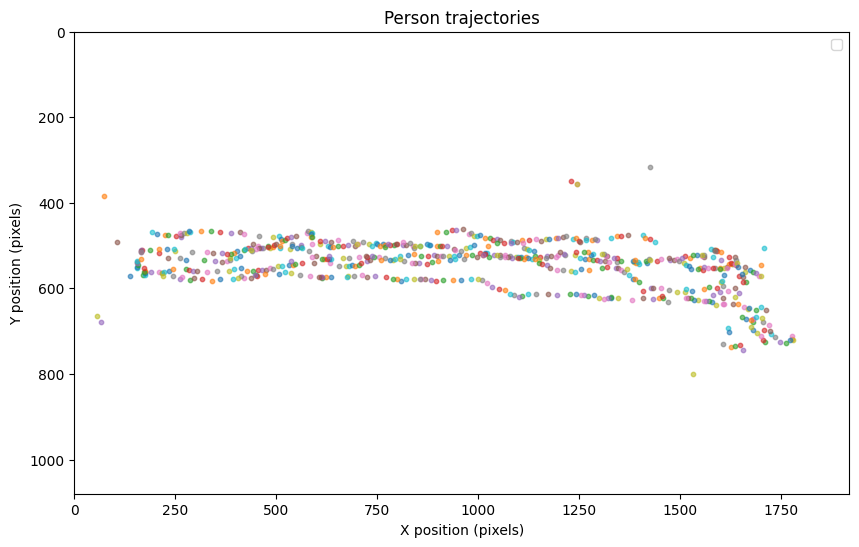

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === CSV読み込み ===
csv_path = "正面入口_detections.csv"  # あなたが保存したCSVのパスに変更
df = pd.read_csv(csv_path)

# === 軌跡を描画 ===
plt.figure(figsize=(10, 6))

for i, row in df.iterrows():
    if pd.isna(row["detections"]) or row["detections"] == "":
        continue
    
    # 1フレーム内に複数人がいる場合は ; で区切られているので分割
    detections = row["detections"].split(";")
    for det in detections:
        cls, conf, cx, cy, w, h = det.split(":")
        cx, cy = float(cx), float(cy)

        plt.scatter(cx, cy, s=10, alpha=0.6, label="person" if i == 0 else "")

plt.gca().invert_yaxis()  # OpenCV座標系に合わせる（y軸下向き）
plt.xlim(0, 1920)
plt.ylim(1080, 0)
plt.xlabel("X position (pixels)")
plt.ylabel("Y position (pixels)")
plt.title("Person trajectories")
plt.legend()
plt.show()


In [4]:
import cv2
from ultralytics import YOLO, solutions
import os
import csv

# 1. MP4動画ファイルのパスを指定
input_mp4_path = "正面入口.mp4"

# 2. 動画ファイルの読み込み
cap = cv2.VideoCapture(input_mp4_path)
if not cap.isOpened():
    print("動画ファイルを読み込めませんでした。パスを確認してください。")
    exit()

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
                                       cv2.CAP_PROP_FRAME_HEIGHT,
                                       cv2.CAP_PROP_FPS))

# 3. 処理済み動画の出力設定
filename_without_ext = os.path.splitext(input_mp4_path)[0]
output_mp4_path = f"{filename_without_ext}_processed.mp4"

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_mp4_path, fourcc, fps, (w, h))

# 4. カウント領域の定義（Line）
region_points = [(600, 460), (300, 1670)]

# 5. ObjectCounterクラスの初期化（表示用）
counter = solutions.ObjectCounter(
    show=False,
    region=region_points,
    model="yolo11n.pt",  # 人検出に特化
    classes=[0],
    show_in=True,
    show_out=True,
)

# 6. YOLOモデルの初期化（CSV用）
model = YOLO("yolo11n.pt")

# 7. CSVファイルの準備
csv_path = f"{filename_without_ext}_detections.csv"
csv_file = open(csv_path, "w", newline="", encoding="utf-8")
writer = csv.writer(csv_file)
writer.writerow(["frame", "detections"])  # detections列にまとめて書く

# 8. 動画フレームの処理
frame_idx = 0
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("動画の処理が完了しました。")
        break

    # --- カウントライン処理 ---
    _ = counter(im0)
    im_bgr = counter.annotator.im

    # --- YOLOによる検出（CSV用） ---
    results = model.predict(im0, classes=[0], verbose=False)
    detections = []

    if results and len(results[0].boxes) > 0:
        for box in results[0].boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            width = x2 - x1
            height = y2 - y1
            cx = x1 + width / 2
            cy = y1 + height / 2
            cls = int(box.cls[0].item())
            conf = float(box.conf[0].item())
            detections.append(f"{cls}:{conf:.2f}:{cx:.1f}:{cy:.1f}:{width:.1f}:{height:.1f}")

    # --- CSVに書き込み ---
    writer.writerow([frame_idx, ";".join(detections)])

    # --- 出力動画保存と表示 ---
    video_writer.write(im_bgr)
    resized_im_bgr = cv2.resize(im_bgr, (int(w / 2), int(h / 2)))
    cv2.imshow("Object Counting", resized_im_bgr)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_idx += 1

# 9. リソース解放
cap.release()
video_writer.release()
csv_file.close()
cv2.destroyAllWindows()

print(f"検出結果を {csv_path} に保存しました。")


Ultralytics Solutions:  {'source': None, 'model': 'yolo11n.pt', 'classes': [0], 'show_conf': True, 'show_labels': True, 'region': [(600, 460), (300, 1670)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': False, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING no tracks found!
0: 1080x1920 3.2ms, 
Speed: 644.0ms track, 3.2ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
1: 1080x1920 1.0ms, 
Speed: 83.8ms track, 1.0ms solution per image at shape (1, 3, 1080, 1920)

WARNING no tracks found!
2: 1080x1920 0.9ms, 
Speed: 69.0ms track, 0.9ms solution per image 